Q2. Which field of study leads to the highest debt after graduation?

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
college_df = pd.read_csv(r'/content/drive/My Drive/DATA 606/Final.csv')

In [ ]:
college_df.head()

,Unnamed: 0,Unnamed: 0.1,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,CITY,STATE,ZIP,TUITFTE,INEXPFTE,ACCREDAGENCY,FTFTPCTPELL,cost_living_index_2020,relative_value_dollar_2017
0,0,15,100654.0,1002,Alabama A & M University,Public,1,1101,"Computer and Information Sciences, General.",3,Bachelors Degree,25,36250,376,37194,33,33,54300,17.0,16.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,89.4,115.34
1,1,24,100654.0,1002,Alabama A & M University,Public,1,1313,Teacher Education and Professional Development...,3,Bachelors Degree,46,31505,327,33085,32,31,25400,24.0,33.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,89.4,115.34
2,2,27,100654.0,1002,Alabama A & M University,Public,1,1410,"Electrical, Electronics and Communications Eng...",3,Bachelors Degree,22,34809,361,36482,33,31,54500,19.0,11.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,89.4,115.34
3,3,37,100654.0,1002,Alabama A & M University,Public,1,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelors Degree,39,29956,311,30970,30,30,24000,28.0,28.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,89.4,115.34
4,4,38,100654.0,1002,Alabama A & M University,Public,1,2601,"Biology, General.",3,Bachelors Degree,59,34000,353,32783,31,30,23800,30.0,43.0,Normal,AL,35762,7413.0,5384.0,Southern Association of Colleges and Schools C...,0.7057,89.4,115.34


In [ ]:
del college_df['Unnamed: 0.1']
del college_df['Unnamed: 0']

In [ ]:
top_debt=college_df[['DEBTMEDIAN','CIPDESC','CREDDESC','INSTNM']].sort_values(by='DEBTMEDIAN',ascending=False).head(50)
top_debt

,DEBTMEDIAN,CIPDESC,CREDDESC,INSTNM
3840,403691,Dentistry.,First Professional Degree,University of Southern California
3115,393548,Dentistry.,First Professional Degree,Western University of Health Sciences
30221,387660,Dentistry.,First Professional Degree,New York University
5431,374924,Dentistry.,First Professional Degree,A T Still University of Health Sciences
3420,360439,Dentistry.,First Professional Degree,University of the Pacific
32817,339019,Dentistry.,First Professional Degree,Case Western Reserve University
21252,338646,Dentistry.,First Professional Degree,University of Detroit Mercy
31450,326042,Dentistry.,First Professional Degree,University of Nevada-Las Vegas
27960,322508,Dentistry.,First Professional Degree,Lake Erie College of Osteopathic Medicine
9666,316711,Dentistry.,First Professional Degree,Tufts University


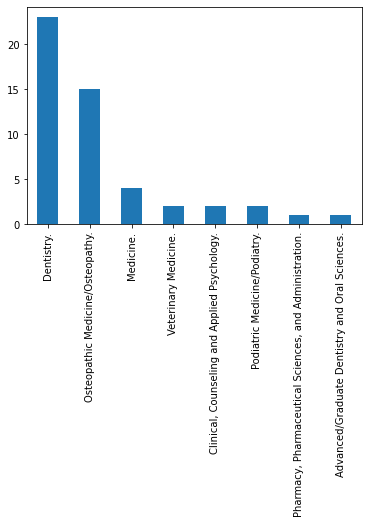

In [ ]:
top_debt['CIPDESC'].value_counts().plot(kind="bar")

In [ ]:
college_df.groupby('CIPDESC')['DEBTMEDIAN'].nunique().nlargest(5)

CIPDESC
Business Administration, Management and Operations.                                   1229
Registered Nursing, Nursing Administration, Nursing Research and Clinical Nursing.    1195
Liberal Arts and Sciences, General Studies and Humanities.                             594
Teacher Education and Professional Development, Specific Levels and Methods.           575
Accounting and Related Services.                                                       538
Name: DEBTMEDIAN, dtype: int64

Takeaway points:<br>
1. Study fields 'Dentistry', 'Osteopathy' and 'Medicine' top the list of students left with highest amount of debt after graduation.<br>
2. Study fields 'Business Administration', 'Registered Nursing and Nursing Research' and 'Liberal Arts and Sciences' have left highest number of students with debt.

Q3. Bachelor's vs Master's vs Doctoral degree: which degree leads to high earning and less debt?

In [ ]:
college_df['CIPDESC'].nunique()

317

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
degrees = ["Bachelors Degree","Master's Degree","Doctoral Degree"]
college_df_req = college_df[college_df.CREDDESC.isin(degrees)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


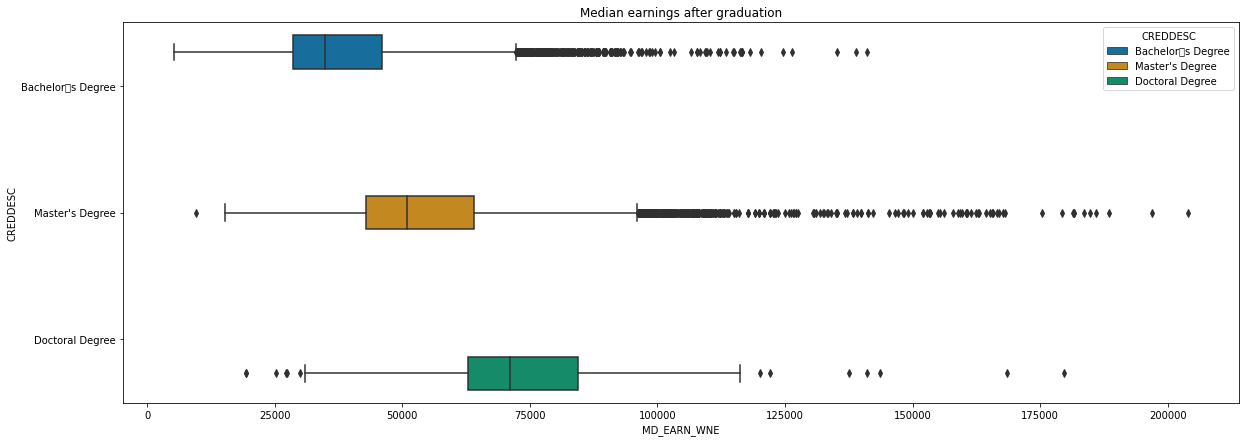

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Median earnings after graduation")  
sns.boxplot(y='CREDDESC', x='MD_EARN_WNE', 
                 data=college_df_req,
                 palette="colorblind",
                hue='CREDDESC')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


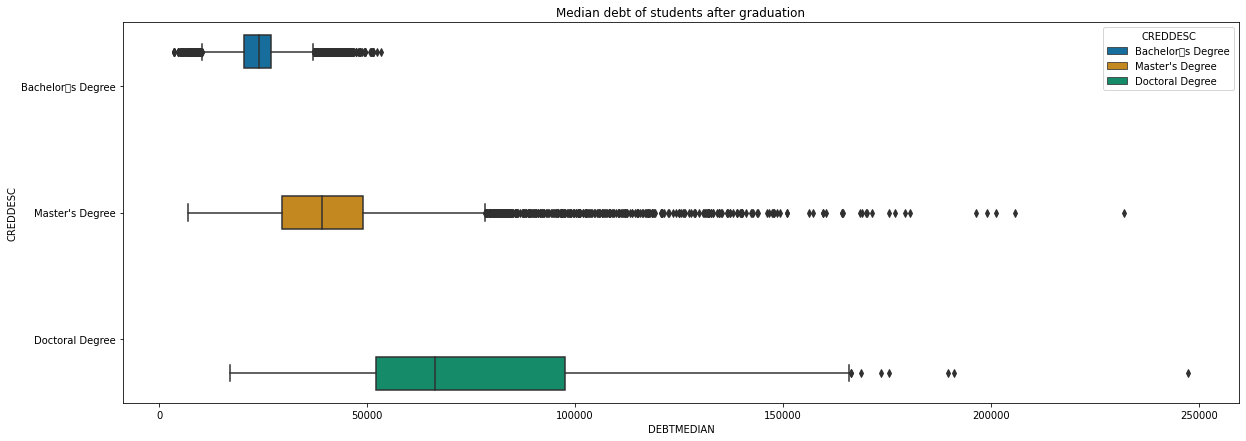

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Median debt of students after graduation")
sns.boxplot(y='CREDDESC', x='DEBTMEDIAN', 
                 data=college_df_req,
                 palette="colorblind",
                hue='CREDDESC')

After comparing the box plots, we can conclude there is no degree which leaves a student with high earning and less debt. Students having a higher degree seem to have both high pay and high debt and vice versa.